# SWISSIMAGE 10 cm

_See [the official webpage](https://www.swisstopo.admin.ch/de/orthobilder-swissimage-10-cm) for more information._

In [1]:
import os

import requests

from pyproj import CRS, Transformer

import rasterio

import matplotlib.pyplot as plt

In [2]:
# Get relevant CRS
wgs84_crs = CRS.from_epsg(4326)
lv95_crs = CRS.from_user_input(2056)
transformer = Transformer.from_crs(wgs84_crs, lv95_crs, always_xy=True)

In [3]:
# Center at EPFL, given in WGS 84
latitude, longitude = 46.520278, 6.565556

# Convert to LV 95
x, y = transformer.transform(longitude, latitude)
x, y

(2533003.7065894613, 1152482.309586)

In [4]:
# Get associated tile
i = int(x / 1000)
j = int(y / 1000)
i, j

(2533, 1152)

In [5]:
# Download file, if needed
# Note: the URL might be wrong, if there is not a recent image for this coordinate (i.e. try an older year)
year = 2023
url = f"https://data.geo.admin.ch/ch.swisstopo.swissimage-dop10/swissimage-dop10_{year}_{i}-{j}/swissimage-dop10_{year}_{i}-{j}_0.1_2056.tif"
name = os.path.basename(url)
path = f"../data/swissimage/{name}"
if not os.path.exists(path):
    response = requests.get(url)
    response.raise_for_status()
    with open(path, "wb") as file:
        file.write(response.content)

In [6]:
# Show metadata only
with rasterio.open(path) as dataset:
    print("CRS:", dataset.crs)
    print("Bounds:", dataset.bounds)
    print("Width, Height:", dataset.width, dataset.height)
    print("Number of bands:", dataset.count)

CRS: EPSG:2056
Bounds: BoundingBox(left=2533000.0, bottom=1152000.0, right=2534000.0, top=1153000.0)
Width, Height: 10000 10000
Number of bands: 3


In [7]:
# Check that we did not mess up the URL
assert dataset.bounds.left <= x < dataset.bounds.right
assert dataset.bounds.bottom <= y < dataset.bounds.top

In [8]:
# Load the full RGB image
with rasterio.open(path) as dataset:
    image = dataset.read()

In [9]:
# Each image is 1km x 1km, with 10cm resolution
image.shape

(3, 10000, 10000)

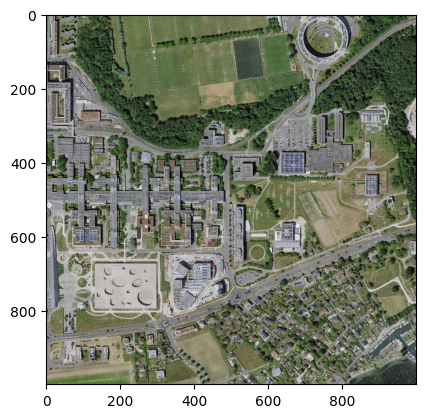

In [10]:
# Show downsampled version
_, ax = plt.subplots()
ax.imshow(image.transpose(1, 2, 0)[::10, ::10])
plt.show()